<a href="https://colab.research.google.com/github/vedantdave77/Project-Deep_Dream/blob/master/Mini_Project_(Fashion_MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Fashion-MNIST

As previous project I will apply neural network, as per google the best performace can get around 97 %, but I will try to get answer as much possible.
- Fashion MNIST is here as follow, you can download it, but I will use the PyTorch inner library dataset.|
[Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist)

In [0]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
tensor(7)


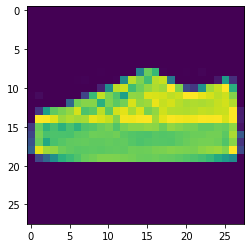

In [36]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)
#print(images[0]) #Use it, just to see what image look like if you are NN
plt.imshow(images[0].numpy().squeeze(), cmap = None)
print(labels[0])

## Building the network

Here, I will use following parameter to train the network:
> - loss : [Cross Entropy Loss](https://en.wikipedia.org/wiki/Cross_entropy)
- Optimizer: [Adam optimizer](https://www.youtube.com/watch?v=JXQT_vxqwIs) explained by my personal favourite Andrew NG

building a self method network

In [0]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self,x):
        x = x.view(x.shape[0],-1)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x),dim =1)

        return x

# Train the network


In [0]:
#@title Tuning Parameters { display-mode: "both" }
learning_rate = 0.01 #@param {type:"slider", min:0.01, max:0.9, step:0.01}
model = Classifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = learning_rate)
epoches =  10    #@param {type:"number"}

for e in range(epoches):
  running_loss = 0
  for images ,labels in trainloader:
    output = model(images)
    loss = criterion(output,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  else:
    print('the total loss = {}'.format(running_loss/ len(trainloader)))


the total loss = 1.6731426195422214
the total loss = 1.8832275401046281
the total loss = 1.9758804952666196
the total loss = 1.8375002725292116


Some observations: just try it for experience: learning rate 0.1 (too high for our model) >> give us result around 2.014 and do not go lower than that is called local minima phenomena. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
# here helper module is changed so the supported view_classify does not work here is th defyning function for that.
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[3]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Give example to torch, pass from model
ps = torch.exp(model(img))

# Plot the image and probabilities
view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[63]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

ps = torch.exp(model(img))

# Plot the image and probabilities
view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

In [0]:
# Keep Learning, Enjoy Empowering